In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir("C:/Nakul/UCLA Coursework/5. Fall 2018/Full Time/Lending CLub/Case Study/Payments_Made_to_Investors_2019_01")


In [3]:
#Reading Data

mylist = []
#Data Set is big and has been to read in chunks
for chunk in  pd.read_csv('PMTHIST_INVESTOR_201901.csv', chunksize=20000, low_memory=False):
    mylist.append(chunk)

big_data = pd.concat(mylist, axis= 0)
del mylist

In [4]:
#Copying Original Data

original_data=big_data.copy()
big_data.shape
big_data.head()

,LOAN_ID,RECEIVED_D,PERIOD_END_LSTAT,Month,MOB,CO,PBAL_BEG_PERIOD_INVESTORS,PRNCP_PAID_INVESTORS,INT_PAID_INVESTORS,FEE_PAID_INVESTORS,...,MonthsSinceLastRec,EmploymentLength,currentpolicy,grade,term,appl_fico_band,Last_FICO_BAND,vintage,PCO_RECOVERY_INVESTORS,PCO_COLLECTION_FEE_INVESTORS
0,54734,SEP2009,Current,SEP2009,1,0,19080.057200,443.647900,189.123117,0.0,...,NaN,< 1 year,1,B,36,735-739,755-759,09Q3,NaN,NaN
1,54734,OCT2009,Current,OCT2009,2,0,18636.409300,448.045375,184.725642,0.0,...,NaN,< 1 year,1,B,36,735-739,755-759,09Q3,NaN,NaN
2,54734,NOV2009,Current,NOV2009,3,0,18188.363925,452.486438,180.284579,0.0,...,NaN,< 1 year,1,B,36,735-739,785-789,09Q3,NaN,NaN
3,54734,DEC2009,Current,DEC2009,4,0,17735.877487,456.971521,175.799496,0.0,...,NaN,< 1 year,1,B,36,735-739,780-784,09Q3,NaN,NaN
4,54734,JAN2010,Current,JAN2010,5,0,17278.905966,461.501061,171.269956,0.0,...,NaN,< 1 year,1,B,36,735-739,800-804,09Q3,NaN,NaN


In [4]:
##Unique Loans 
unique_loans=big_data[['LOAN_ID','grade','term','EmploymentLength','State','IssuedDate','HomeOwnership']].drop_duplicates()
unique_loans.shape

(2132023, 7)

In [5]:
#Fully Paid Loans Analysis
fully_paid_loans=big_data.loc[big_data['PERIOD_END_LSTAT']=='Fully Paid'].drop_duplicates()
fully_paid_loans.IssuedDate = pd.to_datetime(fully_paid_loans.IssuedDate)
fully_paid_loans['Issued_Yr'] = fully_paid_loans.IssuedDate.dt.year
#f1=fully_paid_loans.head(20)

## Term 36 months
fpaid_36m=fully_paid_loans.loc[fully_paid_loans['term']==36]
fpaid_60m=fully_paid_loans.loc[fully_paid_loans['term']==60]

fpaid_36m['grade'].value_counts() #Number of fully paid 36 month loans given by grade
fpaid_60m['grade'].value_counts() #Number of fully paid 60 month loans given by grade

C    71350
D    44720
B    36021
E    31994
F    12740
A     5118
G     3684
Name: grade, dtype: int64

In [9]:
#Full-paid loans by term and grade

fully_paid_loans.groupby("term")["grade"].value_counts().sort_index() #Overall
#fully_paid_loans.shape

term  grade
36    A        197622
      B        280173
      C        205455
      D         87342
      E         23093
      F          4437
      G           816
60    A          5118
      B         36021
      C         71350
      D         44720
      E         31994
      F         12740
      G          3684
Name: grade, dtype: int64

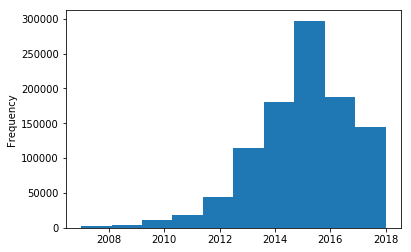

In [10]:
#Fully Paid Loans by Year
fully_paid_loans['Issued_Yr'].plot.hist()


C:\Users\nakul\Anaconda3\Anaconda_new\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Average Interest Rate of 36 months loan over time and grade')

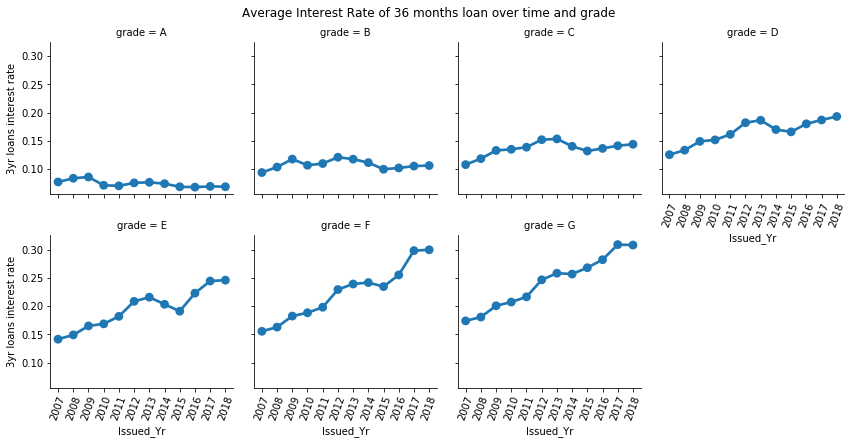

In [11]:
## Loan interest rates by grade and year for 36 month loans

rate_36 = pd.pivot_table( fpaid_36m,index=["grade","Issued_Yr"],values=["InterestRate"], aggfunc=np.mean)
rate_36 = rate_36.reset_index()
rate_36.head(2)

g_36 = sns.FacetGrid(rate_36, col = 'grade', col_wrap = 4)
g_36 = g_36.map(sns.pointplot,"Issued_Yr","InterestRate")

labels = np.arange(2007, 2019, 1)
labels = [str(i) for i in labels]
g_36 = g_36.set_xticklabels(labels, rotation=70)
g_36 = g_36.set_ylabels("3yr loans interest rate")

plt.subplots_adjust(top=0.9)
g_36.fig.suptitle('Average Interest Rate of 36 months loan over time and grade')

C:\Users\nakul\Anaconda3\Anaconda_new\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Average Interest Rate of 60 months loan over time and grade')

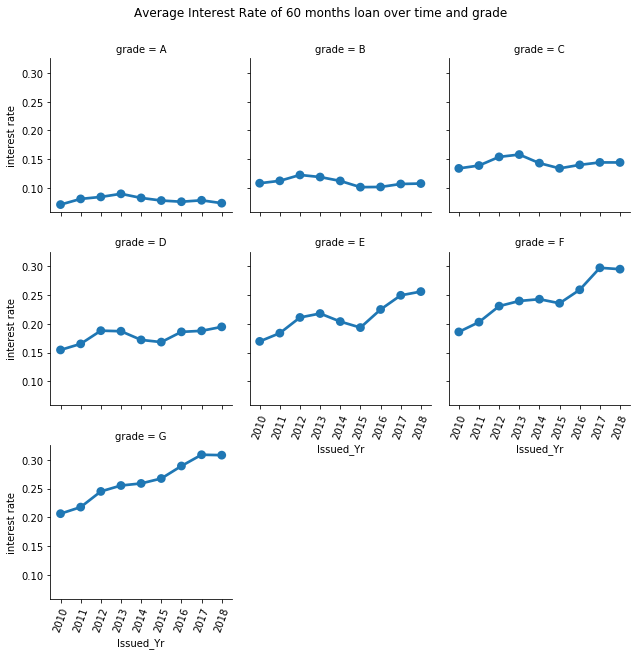

In [12]:
## Loan interest rates by grade and year for 60 month loans

rate_60 = pd.pivot_table( fpaid_60m,index=["grade","Issued_Yr"],values=["InterestRate"], aggfunc=np.mean)
rate_60 = rate_60.reset_index()
rate_60.head(2)

g = sns.FacetGrid(rate_60, col = 'grade', col_wrap = 3)
g = g.map(sns.pointplot,"Issued_Yr","InterestRate")

labels = np.arange(2010, 2019, 1)
labels = [str(i) for i in labels]
g = g.set_xticklabels(labels, rotation=70)
g = g.set_ylabels("interest rate")

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Average Interest Rate of 60 months loan over time and grade')

In [13]:
#Merge Interest Rates for both terms
rate_all=pd.merge(rate_36,rate_60,on=('grade','Issued_Yr'))
rate_all = rate_all.rename(columns={'InterestRate_x': 'InterestRate_36', 'InterestRate_y': 'InterestRate_60'})
#print(rate_all)

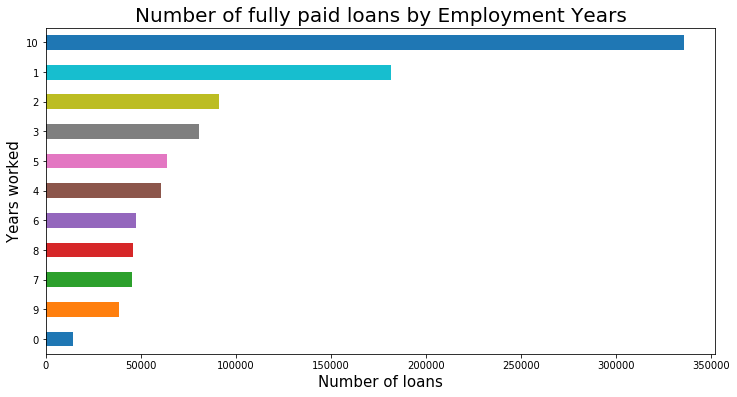

In [14]:
fully_paid_loans['EmploymentLength'].fillna(value=0,inplace=True)

#Filled the null values with 0 assuming that the borrower hasn't worked many years for his data to be recorded. 
#Filled 10+ years as 10 and <1 year as 1
fully_paid_loans['EmploymentLength'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

fully_paid_loans['EmploymentLength'].value_counts().sort_values().plot(kind='barh',figsize=(12,6))
plt.title('Number of fully paid loans by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

In [15]:
#Calculating Net Annualized Returns
loan_int=big_data[['LOAN_ID','MOB','INT_PAID_INVESTORS','COAMT_INVESTORS','PBAL_BEG_PERIOD_INVESTORS']].dropna()
loan_int2=loan_int.groupby('LOAN_ID',as_index=False).aggregate(pd.np.sum)

loan_int2['compund_ret']=(1+(loan_int2['INT_PAID_INVESTORS']-loan_int2['COAMT_INVESTORS'])/loan_int2['PBAL_BEG_PERIOD_INVESTORS'])**12-1
loan_int2.head()

,LOAN_ID,MOB,INT_PAID_INVESTORS,COAMT_INVESTORS,PBAL_BEG_PERIOD_INVESTORS,compund_ret
0,54734,351,3304.928830,0.000000,333424.237725,0.125649
1,55716,253,1246.976142,0.000000,58050.277203,0.290516
2,55742,666,116.830936,0.000000,13090.300906,0.112517
3,56121,351,671.250755,3522.890755,141728.615027,-0.216440
4,56413,105,0.000480,0.006655,0.095708,-0.550823


In [16]:
#Charged Off loans

coff_loans=big_data.loc[big_data['PERIOD_END_LSTAT']=='Charged Off'].drop_duplicates()
coff_loans.IssuedDate = pd.to_datetime(coff_loans.IssuedDate)
coff_loans['Issued_Yr'] = coff_loans.IssuedDate.dt.year
coff_loans.head()

,LOAN_ID,RECEIVED_D,PERIOD_END_LSTAT,Month,MOB,CO,PBAL_BEG_PERIOD_INVESTORS,PRNCP_PAID_INVESTORS,INT_PAID_INVESTORS,FEE_PAID_INVESTORS,...,EmploymentLength,currentpolicy,grade,term,appl_fico_band,Last_FICO_BAND,vintage,PCO_RECOVERY_INVESTORS,PCO_COLLECTION_FEE_INVESTORS,Issued_Yr
109,56121,NaN,Charged Off,MAR2018,26,1,3522.890755,0.0,0.0,0.0,...,10+ years,1,A,36,705-709,LOW-499,16Q1,NaN,NaN,2016
123,56413,NaN,Charged Off,JUN2009,14,1,0.006655,0.0,0.0,0.0,...,10+ years,0,F,36,645-649,LOW-499,08Q2,2.676369e-07,4.817465e-08,2008
167,57167,NaN,Charged Off,APR2015,8,1,23108.329138,0.0,0.0,0.0,...,1 year,1,D,36,660-664,600-604,14Q3,3.318036e+03,5.972464e+02,2014
394,61419,NaN,Charged Off,MAR2013,36,1,355.381905,0.0,0.0,0.0,...,1 year,1,D,36,665-669,LOW-499,10Q1,4.298647e+01,1.045804e+00,2010
435,62774,NaN,Charged Off,AUG2009,16,1,2433.399494,0.0,0.0,0.0,...,1 year,0,F,36,675-679,LOW-499,08Q1,1.110362e+02,1.156713e+00,2008


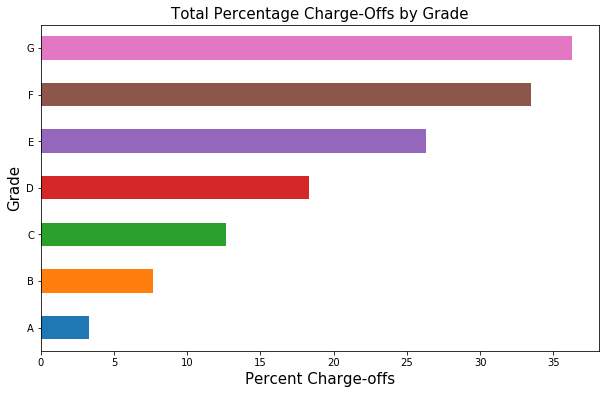

In [17]:
#Percentage Charge-Offs by Grade
cvalues=(coff_loans['grade'].value_counts().sort_index()/unique_loans['grade'].value_counts().sort_index())*100
cvalues.plot(kind='barh',figsize=(10,6))
plt.title('Total Percentage Charge-Offs by Grade',fontsize=15)
plt.xlabel('Percent Charge-offs',fontsize=15)
plt.ylabel('Grade',fontsize=15);
#print(cvalues)

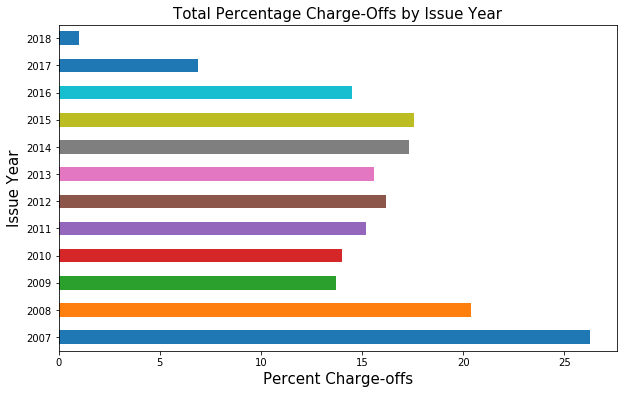

In [18]:
#Percentage Charge-Offs by Year
unique_loans.IssuedDate = pd.to_datetime(unique_loans.IssuedDate)
unique_loans['Issued_Yr'] = unique_loans.IssuedDate.dt.year
cvalues2=(coff_loans['Issued_Yr'].value_counts().sort_index()/unique_loans['Issued_Yr'].value_counts().sort_index())*100
cvalues2.plot(kind='barh',figsize=(10,6))
plt.title('Total Percentage Charge-Offs by Issue Year',fontsize=15)
plt.xlabel('Percent Charge-offs',fontsize=15)
plt.ylabel('Issue Year',fontsize=15);

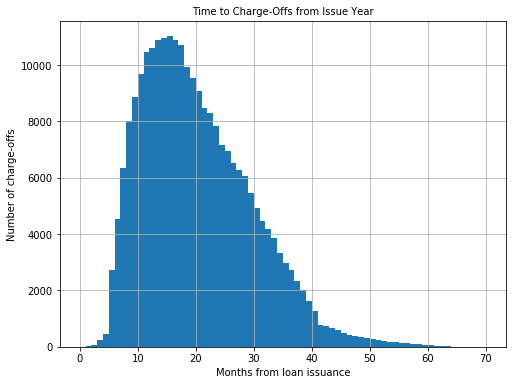

In [19]:
#Number of months to charge off
coff_loans['MOB'].hist(bins=70, range=(0,70), figsize=(8,6))
plt.title('Time to Charge-Offs from Issue Year',fontsize=10)
plt.xlabel('Months from loan issuance',fontsize=10)
plt.ylabel('Number of charge-offs',fontsize=10);

In [133]:
coff_loans.shape
unique_loans.shape
unique_loans.groupby("term")["grade"].value_counts().sort_index() #Overall)
# Unique loans issued by term and grade

term  grade
36    A        375812
      B        511402
      C        401130
      D        175165
      E         47200
      F          8593
      G          2040
60    A         19161
      B        116250
      C        217844
      D        132147
      E         82455
      F         32809
      G         10015
Name: grade, dtype: int64

In [20]:
# Calculating Return of Charged off loans and fully paid
coff_loans2=pd.merge(coff_loans,loan_int2,on=('LOAN_ID'))
coff_loans2.head()




,LOAN_ID,RECEIVED_D,PERIOD_END_LSTAT,Month,MOB_x,CO,PBAL_BEG_PERIOD_INVESTORS_x,PRNCP_PAID_INVESTORS,INT_PAID_INVESTORS_x,FEE_PAID_INVESTORS,...,Last_FICO_BAND,vintage,PCO_RECOVERY_INVESTORS,PCO_COLLECTION_FEE_INVESTORS,Issued_Yr,MOB_y,INT_PAID_INVESTORS_y,COAMT_INVESTORS_y,PBAL_BEG_PERIOD_INVESTORS_y,compund_ret
0,56121,NaN,Charged Off,MAR2018,26,1,3522.890755,0.0,0.0,0.0,...,LOW-499,16Q1,NaN,NaN,2016,351,671.250755,3522.890755,141728.615027,-0.216440
1,56413,NaN,Charged Off,JUN2009,14,1,0.006655,0.0,0.0,0.0,...,LOW-499,08Q2,2.676369e-07,4.817465e-08,2008,105,0.000480,0.006655,0.095708,-0.550823
2,57167,NaN,Charged Off,APR2015,8,1,23108.329138,0.0,0.0,0.0,...,600-604,14Q3,3.318036e+03,5.972464e+02,2014,36,1027.519538,23108.329138,188115.126890,-0.776494
3,61419,NaN,Charged Off,MAR2013,36,1,355.381905,0.0,0.0,0.0,...,LOW-499,10Q1,4.298647e+01,1.045804e+00,2010,666,1198.556101,355.381905,97910.062047,0.108379
4,62774,NaN,Charged Off,AUG2009,16,1,2433.399494,0.0,0.0,0.0,...,LOW-499,08Q1,1.110362e+02,1.156713e+00,2008,136,299.887501,2433.399494,41410.183834,-0.469934


In [23]:
# Calculating Return of fully paid loans
fully_paid_loans2=pd.merge(fully_paid_loans,loan_int2,on=('LOAN_ID'))
fully_paid_loans2.head()

,LOAN_ID,RECEIVED_D,PERIOD_END_LSTAT,Month,MOB_x,CO,PBAL_BEG_PERIOD_INVESTORS_x,PRNCP_PAID_INVESTORS,INT_PAID_INVESTORS_x,FEE_PAID_INVESTORS,...,Last_FICO_BAND,vintage,PCO_RECOVERY_INVESTORS,PCO_COLLECTION_FEE_INVESTORS,Issued_Yr,MOB_y,INT_PAID_INVESTORS_y,COAMT_INVESTORS_y,PBAL_BEG_PERIOD_INVESTORS_y,compund_ret
0,54734,OCT2011,Fully Paid,OCT2011,26,0,5564.202196,5564.202196,55.152836,0.0,...,780-784,09Q3,NaN,NaN,2009,351,3304.928830,0.0,333424.237725,0.125649
1,55716,JUN2018,Fully Paid,JUN2018,22,0,1701.688805,1701.688805,50.967337,0.0,...,660-664,16Q3,NaN,NaN,2016,253,1246.976142,0.0,58050.277203,0.290516
2,55742,JUN2011,Fully Paid,MAY2011,36,0,21.704600,21.704600,0.193714,0.0,...,740-744,08Q2,NaN,NaN,2008,666,116.830936,0.0,13090.300906,0.112517
3,56705,DEC2018,Fully Paid,NOV2018,36,0,293.280218,293.280218,2.441558,0.0,...,700-704,15Q4,NaN,NaN,2015,666,1805.441776,0.0,212834.549662,0.106680
4,57245,MAR2013,Fully Paid,MAR2013,36,0,39.793995,42.204463,0.525537,0.0,...,705-709,10Q1,NaN,NaN,2010,666,257.819531,0.0,23598.638566,0.139274


In [24]:
# Net Annualized return of Fully Paid Loans excluding service fees by grade and term

fully_paid_loans2.groupby("grade")["compund_ret"].mean() #Overall
fully_paid_loans2.groupby(["grade",'term'])["compund_ret"].mean() #Overall

grade  term
A      36      0.074780
       60      0.083690
B      36      0.114708
       60      0.115543
C      36      0.152370
       60      0.157304
D      36      0.196211
       60      0.199950
E      36      0.239105
       60      0.241076
F      36      0.284668
       60      0.290168
G      36      0.314711
       60      0.325366
Name: compund_ret, dtype: float64

In [25]:
# Net Annualized return of Fully Paid Loans excluding service fees by only grade

fully_paid_loans2.groupby("grade")["InterestRate"].mean()

grade
A    0.071180
B    0.106878
C    0.140061
D    0.176354
E    0.209837
F    0.246915
G    0.272236
Name: InterestRate, dtype: float64